You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

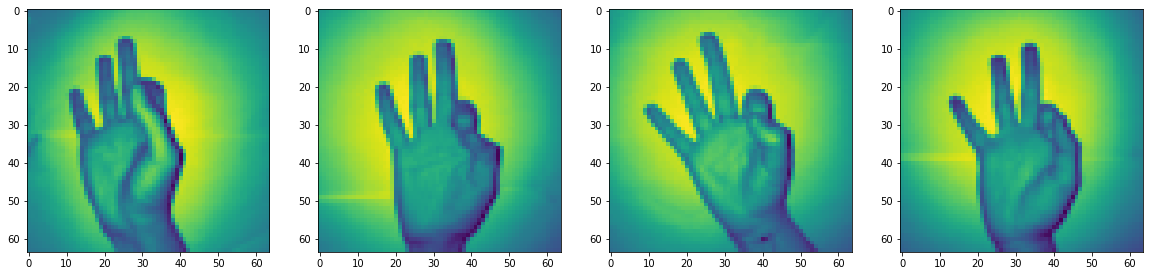

In [ ]:
x_l = np.load("../content/sample_data/X.npy") # image
y_l = np.load("../content/sample_data/Y.npy") # label
fig = plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(x_l[0].reshape(64,64))
plt.subplot(142)
plt.imshow(x_l[1].reshape(64,64))
plt.subplot(143)
plt.imshow(x_l[2].reshape(64,64))
plt.subplot(144)
plt.imshow(x_l[3].reshape(64,64))
plt.show()

# 1.

In [19]:
def sigmoid_fun(x):
    return 1/(1+np.exp(-x))

def log_reg(X,y,lr,itr):
    n,m = X.shape
    y = y.reshape(n,1)
    W = np.zeros((m,1))
    b = 0
    cost = []
    for i in range(0,itr):
        Z = np.dot(X,W) + b
        y_pred = sigmoid_fun(Z)
        cost_val = (-1/m)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        dW = (1/m)*(np.dot(X.T,y_pred - y))

        db = (1/m)*(np.sum(y_pred-y))
        W = W - lr*dW
        b = b - lr*db
        cost.append(cost_val)
        if i%6000 == 0:
          print("cost after ", i, "iteration is : ", cost_val)
    return W,b

def predict(X_test,y_test,W,b):
    Z = np.dot(X_test,W) + b
    y_pred = sigmoid_fun(Z)#(100=>70,30)(30,1)
    y_pred = y_pred > 0.5
    y_pred = y_pred.astype(int)
    y_pred = y_pred.flatten()
    y_test = y_test.flatten()
    acc = 0
    num_correct = 0
    for i in range(len(y_pred)):
        num_correct = np.sum(y_pred == y_test)
        acc = float(num_correct) / len(y_test)
    return acc


In [20]:
def model(X_train,y_tr,X_test,y_te,lr,itr):
    acc = 0
    weight = []
    bais  = []
    for p in range(0,10):
        y_train = y_tr[:,p]
        y_test = y_te[:,p]
        W , b= log_reg(X_train,y_train,lr,itr)
        weight.append(W)
        bais.append(b)
        acc = predict(X_test,y_test,W,b)
        print("\n *******************************")
        print("Accuracy for level: ",p,"is =>",acc)
        print("******************************* \n")
    return weight,bais

In [ ]:
def conFmat(X_test,y_te,wl,bl):
    max_acc = 0
    y_t = y_te[:,1]
    Z = np.dot(X_test,wl[1]) + bl[1]
    y_p = sigmoid_fun(Z)
    y_p = y_p > 0.5
    y_p = y_p.astype(int)
    y_p = y_p.flatten()
    y_t = y_t.flatten()
    cm = confusion_matrix(y_t, y_p)
    return cm

In [21]:
def predictIndividual(X_test,y_test,w,b):
  z=np.dot(X_test,w)+b
  prob = sigmoid_fun(z)
  return prob

In [22]:
## for individual experiment purpose
def final_prediction(X_test,y_test,wl,bl):
  y_pred = []
  for i in range(len(X_test)):
    prob_list = []
    for p in range(0,10):
      prob = predictIndividual(X_test[i],y_test[i][p],wl[p],bl[p])
      prob_list.append(prob[0])
    prob_list = np.array(prob_list)
    index = np.argsort(prob_list)[:1]
    y_pred.append(index)
  return np.array(y_pred).flatten()
    

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = x_l.reshape(2062,4096)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y_l,test_size=0.3,shuffle =True,random_state=123)
weight,bais = model(X_train,y_train,X_test,y_test,0.001,10000)

cost after  0 iteration is :  0.24419223182324246
cost after  6000 iteration is :  0.06826287386628302
Accuracy for level:  0 is => 0.9111470113085622
cost after  0 iteration is :  0.24419223182324246
cost after  6000 iteration is :  0.05568790452239604
Accuracy for level:  1 is => 0.9515347334410339
cost after  0 iteration is :  0.24419223182324246
cost after  6000 iteration is :  0.0909234441369458
Accuracy for level:  2 is => 0.9176090468497576
cost after  0 iteration is :  0.24419223182324246
cost after  6000 iteration is :  0.08707171904336396
Accuracy for level:  3 is => 0.901453957996769
cost after  0 iteration is :  0.24419223182324246
cost after  6000 iteration is :  0.07316939857849829
Accuracy for level:  4 is => 0.9143780290791599
cost after  0 iteration is :  0.24419223182324246
cost after  6000 iteration is :  0.0851780844835533
Accuracy for level:  5 is => 0.9111470113085622
cost after  0 iteration is :  0.24419223182324246
cost after  6000 iteration is :  0.093619726494

First created binary classifier which predict only one digit and other is false means (true)/(false false .....false)
created this type of model for every distinct lebel, in our question contain 10 lebel so ,, we have 10(m0,m1,m2,.....m9) which predict every indivisual correspong digit.
After that test data are inputed in each models  and which model give high prob(softmax) will be the predicted output 

For one vs all (n lebel) = n model required for classification


On the other hand One vs One 


we have 10 lebel so, pair each label to other label this cominatio are  = NC2 == 45 so we required 45 model

So in this case accuracy of OneVSOne model give better accuracy than OnevsAll.

## One vs ALL

In [23]:
def y_label(y_test):
  y_t = []
  for i in range(len(y_test)):
    for p in range(0,10):
      if y_test[i][p]==1:
        y_t.append(p)
  return y_t

In [24]:
def predict_Accuracy(X_test,y_test,weight,bais):
  y_t = np.array(y_label(y_test)) 
  y_t = np.array(y_t)
  y_t = y_t.T
  y_pred = []
  correct_result = 0                
  for i in range(619):
    prob = []
    for j in range(10):
      weights = weight[j]
      weights = weights.flatten()
      x_ = X_test[i]
      bias = bais[j]
      z = np.dot(weights,x_)+bias
      sig_z = sigmoid_fun(z) 
      prob.append(sig_z)
    prob_list = np.array(prob)
    Index = np.where(prob_list == np.amax(prob_list))
    y_pred.append(Index)
    if y_t[i] == Index:
        correct_result+=1
  print(len(y_pred))
  return correct_result/len(y_test),np.array(y_pred)

In [ ]:
Accuracy_final,y_p = predict_Accuracy(X_test,y_test,weight,bais)
y_t = np.array(y_label(y_test))
y_t = y_t.reshape(1,-1).T
y_p = y_p.reshape(1,-1).T
# print(y_p.shape,y_t.shape)
print("Accuracy using 1 vs all custom model : ",Accuracy_final)
print(confusion_matrix(y_true=y_t, y_pred=y_p))
print(classification_report(y_true=y_t, y_pred=y_p, labels=[0,1,2,3,4,5,6,7,8,9]))


619
Accuracy using 1 vs all custom model :  0.6946688206785138
[[54  3  1  0  0  3  3  1  2  1]
 [ 2 55  0  4  2  0  0  0  0  0]
 [ 0  3 39  2  4  3  2  0  2  0]
 [ 1  4  5 36  0  2  0  1 12  1]
 [ 0  4  0  1 52  2  1  0  3  0]
 [ 8  1  1  1  5 39  0  0  2  0]
 [ 8  2  9 13  1  7 22  0  4  3]
 [ 3  1  2  0  2  0  0 47  3  3]
 [ 0  2 12  2  3  2  0  1 36  0]
 [ 2  1  4  1  0  1  0  4  0 50]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        68
           1       0.72      0.87      0.79        63
           2       0.53      0.71      0.61        55
           3       0.60      0.58      0.59        62
           4       0.75      0.83      0.79        63
           5       0.66      0.68      0.67        57
           6       0.79      0.32      0.45        69
           7       0.87      0.77      0.82        61
           8       0.56      0.62      0.59        58
           9       0.86      0.79      0.83        63

    accura

### Diagram of sigmoid function

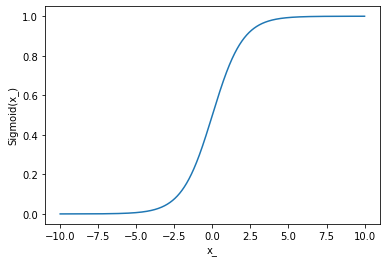

In [ ]:
x_ = np.linspace(-10, 10, 10000000) 
sig = 1/(1 + np.exp(-x_)) 
  
plt.plot(x_,sig) 
plt.xlabel("x_") 
plt.ylabel("Sigmoid(x_)") 
plt.show() 

In [ ]:
y = y_label(y_l)
y = np.array(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle =True,random_state=123)
clf = LogisticRegression(multi_class = 'ovr',solver = 'liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc=accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy from sklearn model : ",acc)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred, labels=[0,1,2,3,4,5,6,7,8,9]))

Accuracy from sklearn model :  0.7609046849757674
[[55  1  0  2  1  4  3  1  0  1]
 [ 1 54  2  2  1  1  2  0  0  0]
 [ 0  1 44  0  0  2  8  0  0  0]
 [ 0  1  3 45  0  2  7  0  4  0]
 [ 0  0  1  1 54  2  3  0  2  0]
 [ 8  1  2  1  4 38  0  0  2  1]
 [ 1  1 12  7  0  4 37  1  4  2]
 [ 2  0  2  1  2  0  0 49  4  1]
 [ 0  1  5  7  4  1  0  3 37  0]
 [ 0  0  0  0  0  0  1  3  1 58]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        68
           1       0.90      0.86      0.88        63
           2       0.62      0.80      0.70        55
           3       0.68      0.73      0.70        62
           4       0.82      0.86      0.84        63
           5       0.70      0.67      0.68        57
           6       0.61      0.54      0.57        69
           7       0.86      0.80      0.83        61
           8       0.69      0.64      0.66        58
           9       0.92      0.92      0.92        63

    accuracy           

## one vs One  using sklearn

In [17]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

x_l = np.load("../content/X.npy") # image
y_l = np.load("../content/Y.npy") # label
from sklearn.preprocessing import MinMaxScaler
X = x_l.reshape(2062,4096)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = y_label(y_l)
y = np.array(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle =True,random_state=123)
OvO_clf = OneVsOneClassifier(LogisticRegression(max_iter=1000))
OvO_clf.fit(X_train,y_train)

y_pred = OvO_clf.predict(X_test)

print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_true=y_test, y_pred=y_pred, labels=[0,1,2,3,4,5,6,7,8,9]))

Accuracy of OvO Classifier: 0.83
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        68
           1       0.92      0.87      0.89        63
           2       0.66      0.87      0.75        55
           3       0.82      0.79      0.80        62
           4       0.90      0.87      0.89        63
           5       0.80      0.70      0.75        57
           6       0.72      0.74      0.73        69
           7       0.93      0.87      0.90        61
           8       0.84      0.81      0.82        58
           9       0.92      0.90      0.91        63

    accuracy                           0.83       619
   macro avg       0.83      0.83      0.83       619
weighted avg       0.84      0.83      0.83       619



### Bonus

## a

In [25]:
from sklearn.preprocessing import MinMaxScaler
X = x_l.reshape(2062,4096)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y_l,test_size=0.3,shuffle =True,random_state=123)
weight,bais = model(X_train,y_train,X_test,y_test,0.01,1000)

cost after  0 iteration is :  0.24419223182324246

 *******************************
Accuracy for level:  0 is => 0.9111470113085622
******************************* 

cost after  0 iteration is :  0.24419223182324246

 *******************************
Accuracy for level:  1 is => 0.9515347334410339
******************************* 

cost after  0 iteration is :  0.24419223182324246

 *******************************
Accuracy for level:  2 is => 0.9176090468497576
******************************* 

cost after  0 iteration is :  0.24419223182324246

 *******************************
Accuracy for level:  3 is => 0.901453957996769
******************************* 

cost after  0 iteration is :  0.24419223182324246

 *******************************
Accuracy for level:  4 is => 0.9143780290791599
******************************* 

cost after  0 iteration is :  0.24419223182324246

 *******************************
Accuracy for level:  5 is => 0.9111470113085622
******************************* 

cost 

In [26]:
Accuracy_final,y_p = predict_Accuracy(X_test,y_test,weight,bais)
y_t = np.array(y_label(y_test))
y_t = y_t.reshape(1,-1).T
y_p = y_p.reshape(1,-1).T
# print(y_p.shape,y_t.shape)
print("Accuracy using 1 vs all custom model : ",Accuracy_final)
print(confusion_matrix(y_true=y_t, y_pred=y_p))
print(classification_report(y_true=y_t, y_pred=y_p, labels=[0,1,2,3,4,5,6,7,8,9]))

619
Accuracy using 1 vs all custom model :  0.6946688206785138
[[54  3  1  0  0  3  3  1  2  1]
 [ 2 55  0  4  2  0  0  0  0  0]
 [ 0  3 39  2  4  3  2  0  2  0]
 [ 1  4  5 36  0  2  0  1 12  1]
 [ 0  4  0  1 52  2  1  0  3  0]
 [ 8  1  1  1  5 39  0  0  2  0]
 [ 8  2  9 13  1  7 22  0  4  3]
 [ 3  1  2  0  2  0  0 47  3  3]
 [ 0  2 12  2  3  2  0  1 36  0]
 [ 2  1  4  1  0  1  0  4  0 50]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        68
           1       0.72      0.87      0.79        63
           2       0.53      0.71      0.61        55
           3       0.60      0.58      0.59        62
           4       0.75      0.83      0.79        63
           5       0.66      0.68      0.67        57
           6       0.79      0.32      0.45        69
           7       0.87      0.77      0.82        61
           8       0.56      0.62      0.59        58
           9       0.86      0.79      0.83        63

    accura

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


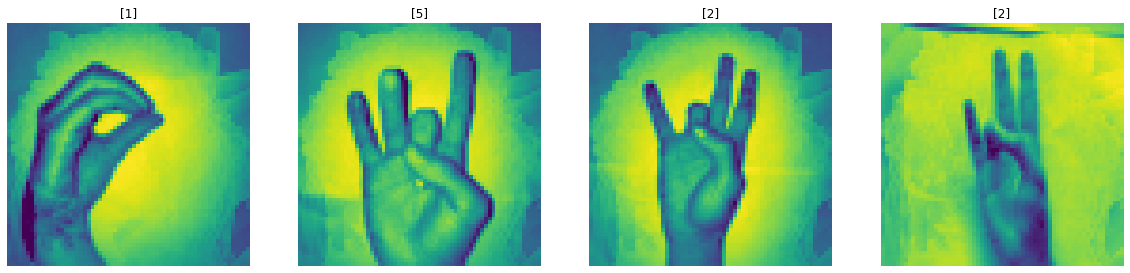

Pridected values are : [1] [5] [1] [3]


In [41]:
fig = plt.figure(figsize=(20,10))
plt.subplot(141)
plt.axis('off')
plt.title(y_t[0])
plt.imshow(X_test[0].reshape(64,64))
plt.subplot(142)
plt.axis('off')
plt.title(y_t[1])
plt.imshow(X_test[1].reshape(64,64))
plt.subplot(143)
plt.axis('off')
plt.title(y_t[2])
plt.imshow(X_test[2].reshape(64,64))
plt.subplot(144)
plt.axis('off')
plt.title(y_t[3])
plt.imshow(X_test[3].reshape(64,64))
plt.show()
print("Pridected values are :",y_p[0],y_p[1],y_p[2],y_p[3])

### b
Yes

Due to precision and recall of the model very high so this resion behind the un aaccuate result from the above 4 output we see  that 50% are model predict output correct.
For increasing the accuracy and currect prediction of model decrease the precision and recall of the model.
this also called as TYPE1 error and TYPE2 error


from comparison to oneVSone  and oneVSall the confusion matrix comparitevelly low so 1vs1 model prediction good from oneVSall. 